### Sentiment Analysis
* Sentiment analysis involves determining the sentiment of text.
* In this lab, you will use a hotel review data set that includes reviews and a rating
 * There are other features that you can ignore, unless you want to use them to improve results
* Your goal is to train a model that can predict the number of stars based on the text
* This is the last programming assignment. We will use similar cleaning and discovery techniques as other assignments
 * ... except we need to add the fun of stop words, stemming / lemmatizing and similar exciting topics.
* Dont forget to save this as a copy in your Google Colab environment



* **Student Name:** Grant Wilson
* **Partner Name:** Manuel Osuna

### Get the data
* Either download the data and store it in your drive or use the Kaggle API to obtain the data from
 * https://www.kaggle.com/datasets/datafiniti/hotel-reviews

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv('7282_1.csv')

df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


### Explore and Clean the Data

In [ ]:
# Show shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (35912, 19)


In [ ]:
# Change names so life is easier :)
df = df.rename(columns={'reviews.rating': 'reviews_rating'})
df = df.rename(columns={'reviews.text': 'reviews_text'})

In [ ]:
# Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
reviews_text      0
reviews_rating    0
language          0
dtype: int64


In [ ]:
# Create dataframe of only important values
df = df[['reviews_text', 'reviews_rating']]
df.head()

,reviews_text,reviews_rating
0,Pleasant 10 min walk along the sea front to th...,4.0
1,Really lovely hotel. Stayed on the very top fl...,5.0
2,Ett mycket bra hotell. Det som drog ner betyge...,5.0
3,We stayed here for four nights in October. The...,5.0
4,We stayed here for four nights in October. The...,5.0


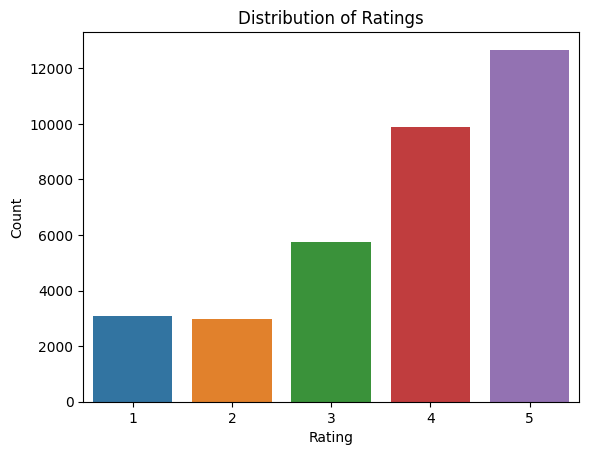

In [ ]:
# Plot distribution of ratings
sns.countplot(x='reviews_rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
# Reviews should be in between 0 and 5. Remove anything that does not follow
df = df[df['reviews_rating']>0]
df = df[df['reviews_rating']<=5]

# Round down decimals
df.reviews_rating = df.reviews_rating.astype(int)

In [ ]:
# Some of the reviews are not in English so they will be removed
# !pip install langdetect
from langdetect import detect
def detect_language(text):
  try:
    return detect(text)
  except:
    return 'unknown'

# New column for language
df['language'] = df['reviews_text'].apply(detect_language)

# View Languages
language_counts = df['language'].value_counts()
print(language_counts)

en         32254
fr           441
es           316
de           252
af           152
it           124
pt           116
no            87
da            81
nl            71
sv            59
unknown       58
ca            55
so            47
ro            33
bn            26
fi            26
tl            23
cy            19
et            17
cs            17
pl            13
tr            10
sw             9
ja             9
sl             8
id             7
sk             5
vi             5
ru             4
hr             3
sq             2
ko             2
lt             2
hu             1
lv             1
zh-cn          1
Name: language, dtype: int64


In [ ]:
# Remove Non English entries
df = df[df['language'] == 'en']

# Print Language counts
language_counts = df['language'].value_counts()
print(language_counts)

en    32254
Name: language, dtype: int64


In [ ]:
# Import necessary libraries for data cleaning
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define function for text cleaning
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert all text to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply text cleaning function to 'reviews.text' column
df['reviews_text'] = df['reviews_text'].apply(clean_text)


In [ ]:
df.head()

,reviews_text,reviews_rating,language
0,pleasant 10 min walk along sea front water bus...,4,en
1,really lovely hotel stayed top floor surprised...,5,en
3,stayed four night october hotel staff welcomin...,5,en
4,stayed four night october hotel staff welcomin...,5,en
5,loved staying island lido need take water veni...,5,en


### Train the Model
* Train the model using 90% of the data
* You may choose whichever model technique you choose

In [ ]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X = df['reviews_text']
y = df['reviews_rating']

# Oversample minority classes
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X.to_frame(), y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.1, random_state=42)


In [ ]:
# Convert text data to numerical vectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train['reviews_text'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [ ]:
# Train Naive Bayes algorithm on training set
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [ ]:
# Make predictions on testing set
X_test_counts = count_vect.transform(X_test['reviews_text'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)


In [ ]:

# Create a new dataframe to compare the predicted ratings to the actual ratings
results_df = pd.DataFrame({'review': X_test['reviews_text'], 'actual_rating': y_test, 'predicted_rating': y_pred})

# Display the results
print(results_df)


                                                  review  actual_rating  \
10656  pro location hotel excellent staff nice room c...              4   
5199   wife enjoyed great extended weekend getawayloc...              5   
21102  stay many time year motel comfort home interne...              5   
26231          bathroom second floor accessible everyone              3   
34417  room smelled strongly smoke even though non sm...              2   
...                                                  ...            ...   
40944  family accompanied work trip area monthly tagg...              2   
29556                                literally slept bad              3   
8467   excellent stay good people room two time staye...              5   
2856   often stay older country inn way gatlinburg fl...              3   
13514  hotel rundown room ok 1 night stay would recom...              1   

       predicted_rating  
10656                 5  
5199                  5  
21102                

### Test the Model
* Test the model using the remaining 10% of the data
* The testing results will depend on the model you use
 * If the rating is evaluated as a number, you need to look at values such as mean square error
 * If you are using categories, then you can use accuracy, but you may want to collapse the categories from 1 to 5 to 3 categories such as bad, neutral, and good.

In [ ]:
# Evaluate performance of model using mean squared error metric
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Mean squared error: 1.0927984533591106
Accuracy: 0.5645239246012567
Precision: 0.6349152605294915
Recall: 0.5645239246012567
F1 score: 0.4624120829959143
Confusion matrix:
 [[   1  263    0    4   14]
 [   0 1157    0   10   59]
 [   0  319    1   82  137]
 [   0  231    0  136  514]
 [   0  109    0   60 1041]]


### Provide an explanation of your model and results

* In the project we used a Naive Bayes algorithm to predict the ratings of the reviews. Alot of changes had to be made to data before actually creating the model. Many unneccessary features were included with the dataset, so we removed those and kept the text and reviews. Along with those changes, there were reviews in the dataset that were not in English. We removed these in order to prevent any issues down the line. Also to make the learning better we removed any "stopwords" and punctuation. We converted the text data into numerical vectors and used it as inout to train using the Naive Bayes algorithm. We used the multinomial implementation of Naive bayes. With the first variations of the model there were issues with predicting the lower values. We connected this to an imbalance in the data becuase of the higher amounts of high reviews. In order to combat this isssue we oversampled the values that had lower occurences like 1, 2, and 3. After this implementation the values were better than before.
* The first renditions of the model had a Mean squared error that was around 2. We noticed that this was do to oversampling of the 4s and 5s which prevented the lower values from being learned proficiently. Oversampling that fixed some issues and brought the Mean squared error down to 1. In this project it may be fine becuase the reviews are still very close to the actual thing.

### Discuss techniques you could use to improve your model if you had more time

* If we had more time to work on the project, we would implement techniques that would use the other features that were originally removed. These features could have some features that aid in predicting the reviews. We can also work on how we over and under sample the values in order to combat bias. We could also try a neural network type technique or by using Support Vector Machines. We could have also done a more in-depth analysis of the text data.